# Метод опорных векторов (SVM, Support Vector Machines)

---

**Источники:**

[An Introduction to Support Vector Machines (SVM)](https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:~:text=A%20support%20vector%20machine%20(SVM,able%20to%20categorize%20new%20text.)

[Метод опорных векторов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2)

[Math Behind SVM(Kernel Trick)](https://medium.com/@ankitnitjsr13/math-behind-svm-kernel-trick-5a82aa04ab04)

[SVM: Feature Selection and Kernels](https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c)

[Support-vector machine](https://en.wikipedia.org/wiki/Support-vector_machine)

[1.4. Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

[]()

[]()

[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.20.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.4'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.2'

In [8]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

## Загрузка данных

[Источник (cell_samples)](https://www.kaggle.com/sam1o1/cell-samplescsv).


| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

In [9]:
df = pd.read_csv("./../../data/cell_samples.csv")

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = "{:.2f}".format

# отобразить первые 5 и последние 5 строк
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Предварительная обработка (pre-processing) и выбор (selection) данных

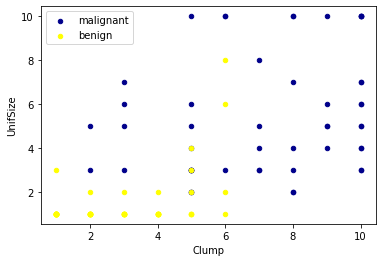

In [10]:
ax = df[df["Class"] == 4][0:50].plot(
    kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant"
)
df[df["Class"] == 2][0:50].plot(
    kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="benign", ax=ax
)
plt.show()

In [11]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [12]:
df.drop("BareNuc", inplace=True, axis="columns")

In [13]:
feature_df = df[
    [
        "Clump",
        "UnifSize",
        "UnifShape",
        "MargAdh",
        "SingEpiSize",
        "BlandChrom",
        "NormNucl",
        "Mit",
    ]
]
X = feature_df
y = df["Class"]

In [14]:
# benign (=2) / malignant (=4)
y.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## SVM

**Метод опорных векторов (англ. SVM, support vector machine)** — **набор схожих алгоритмов** обучения с учителем, использующихся для задач **классификации** и **регрессионного** анализа. 

<img src="images/svm_reg_class.png" width="600">


SVM семейству линейных классификаторов и может также рассматриваться как **частный случай регуляризации по Тихонову (частный случай — это Ridge)**. Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как **метод классификатора с максимальным зазором**.

<img src="images/svm_ex2.png" width="600">

<img src="images/svm_ex1.png" width="500">


**Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве.** Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, создающая наибольшее расстояние до двух параллельных гиперплоскостей.

Алгоритм основан на допущении, что **чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора**.

### Ядра

Помимо выполнения линейной классификации, **SVM могут эффективно выполнять нелинейную классификацию**, используя так называемый **трюк с ядром (kernel trick)**, неявно отображая свои входные данные в пространственные объекты большой размерности.

<img src="images/svm_lin_nonlin.png" width="600">

<img src="images/svm_kernels.png" width="600">

### Достоинства

- Эффективен в пространствах больших размеров.
- По-прежнему эффективен в случаях, когда количество измерений (dimensions, features, columns) превышает количество образцов (samples, rows).
- Использует подмножество обучающих (training) точек в функции принятия решений (также известной как опорные вектора), поэтому это также эффективно с точки зрения памяти.
- Универсальность: для функции принятия решения могут быть указаны различные функции ядра. В `sklearn` имеются типичные [ядра](https://scikit-learn.org/stable/modules/svm.html#svm-kernels) (common kernels), но также можно указать собственные ядра.

### Недостатки

- Если количество признаков (features) намного превышает количество выборок (samples), избегайте переобучения (over-fitting) при выборе функций ядра, в этом случае регуляризация имеет решающее значение.
- SVM не предоставляют напрямую оценки вероятностей (probability estimates), они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки (five-fold cross-validation).

## Обучение модели (Train)

In [16]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
model

SVC()

In [17]:
y_predicted = model.predict(X_test)
y_predicted

array([4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4])

## Оценка качества модели (Evaluation)

In [44]:
y_predicted_s = pd.Series(data=y_predicted, name="Class_pred", index=y_test.index)
X_test[y_test != y_predicted_s].join(y_test).join(y_predicted_s)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class,Class_pred
72,1,3,3,2,2,7,2,1,2,4
179,5,3,3,3,6,3,1,1,4,2
273,7,2,4,1,3,3,3,1,4,2
455,10,2,2,1,2,1,1,2,4,2
319,4,4,4,4,6,7,3,1,2,4
356,5,3,3,1,3,3,3,3,4,2


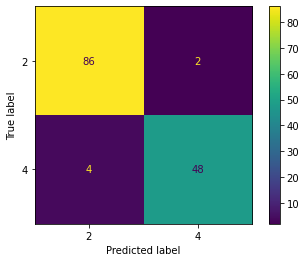

In [18]:
plot_confusion_matrix(model, X_test, y_test)

In [19]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97        88
           4       0.96      0.92      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [20]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average="macro")
recall = recall_score(y_test, y_predicted, average="macro")
f1 = f1_score(y_test, y_predicted, average="macro")
roc_auc = roc_auc_score(y_test, y_predicted, average="macro")

print(
    f"accuracy = {accuracy:.3f}\nprecision = {precision:.3f}\nrecall = {recall:.3f}\nf1 = {f1:.3f}\nroc_auc = {roc_auc:.3f}"
)

accuracy = 0.957
precision = 0.958
recall = 0.950
f1 = 0.954
roc_auc = 0.950


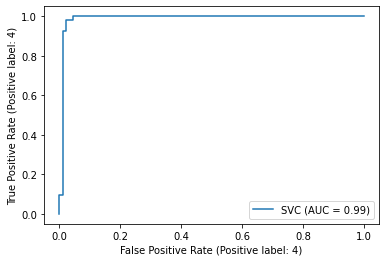

In [21]:
plot_roc_curve(model, X_test, y_test)

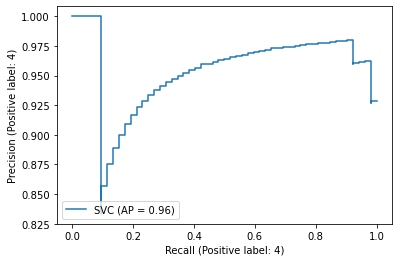

In [22]:
plot_precision_recall_curve(model, X_test, y_test)